In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

from utils.utility_functions import jaccard_index

In [2]:
# Paths and input
leiden = pd.read_csv(os.path.join(os.getcwd(), 'input/CRC-097_leiden.csv'))
hdbscan = pd.read_csv(os.path.join(os.getcwd(), 'input/CRC-097_hdbscan.csv'))
hdbscan = hdbscan[hdbscan['hdbscan'] != -1]

out = os.path.join(os.getcwd(), 'output/Leiden-HDBSCN_Jaccard')
if not os.path.exists(out):
    os.makedirs(out)

In [3]:
# Group cell indices per cluster
leiden_dict = {}
for name, group in leiden.groupby('Cluster'):
    leiden_dict[name] = group['CellID'].tolist()

hdbscan_dict = {}
for name, group in hdbscan.groupby('hdbscan'):
    hdbscan_dict[name] = group['CellID'].tolist()

# Initialize Jaccard Index matrix with zeros
num_clusters_leiden = len(leiden_dict.keys())
num_clusters_hdbscan = len(hdbscan_dict.keys())
ji_matrix = [[0] * num_clusters_leiden for _ in range(num_clusters_hdbscan)] # HDBSCAN clusters will comprise matrix rows

# Calculate Jaccard Index for each pair of clusters
for i, j in product(range(num_clusters_hdbscan), range(num_clusters_leiden)):
	ji_matrix[i][j] = jaccard_index(hdbscan_dict[i], leiden_dict[j])

plot_input = pd.DataFrame(ji_matrix)

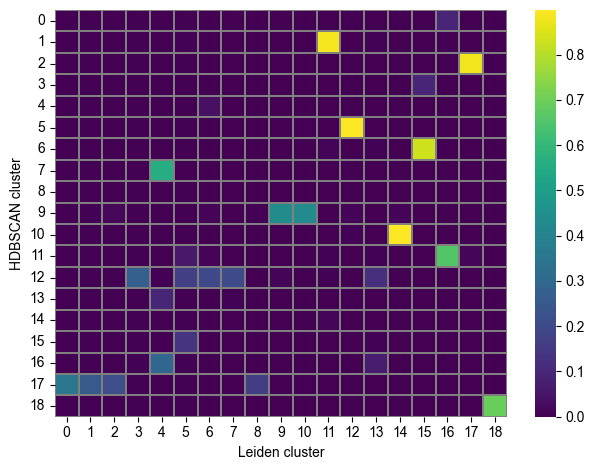

In [4]:
# Plot
plt.rcParams['font.family'] = 'Arial'
g = sns.heatmap(plot_input, cmap='viridis', linecolor='gray', linewidth=0.1)
g.set_ylabel('HDBSCAN cluster')
g.set_xlabel('Leiden cluster')
g.set_yticklabels(g.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(out, f'Leiden-HDBSCAN_Jaccard_indices.pdf'), bbox_inches='tight')
plt.show()